## Лабораторная работа №4
## Выполнили Смирнов Егор и Максимов Артем

В данной работе мы построили регрессию для 2 датасетов и поработали с параметрами для этой регрессии.

Вначале мы поработали с датасетом о работе электростанции:

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Первым делом мы вывели общую информацию о сете, чтобы получить первое представление о данных, с которыми нам надо работать.

In [2]:
import pandas as pd
ElectricityRaw = pd.read_csv('electricity.csv')
ElectricityRaw.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Нашей задачей было научиться предугадывать 5й столбец сета, по значениям первых 4. Это мы реализовали следующим образом:

LinearRegression
R^2 = 0.9286671154781789, indepenent term: 0.00014330371825799305,
coeffs = [-0.87399469 -0.17018652  0.01738785 -0.13749932],
Ridge


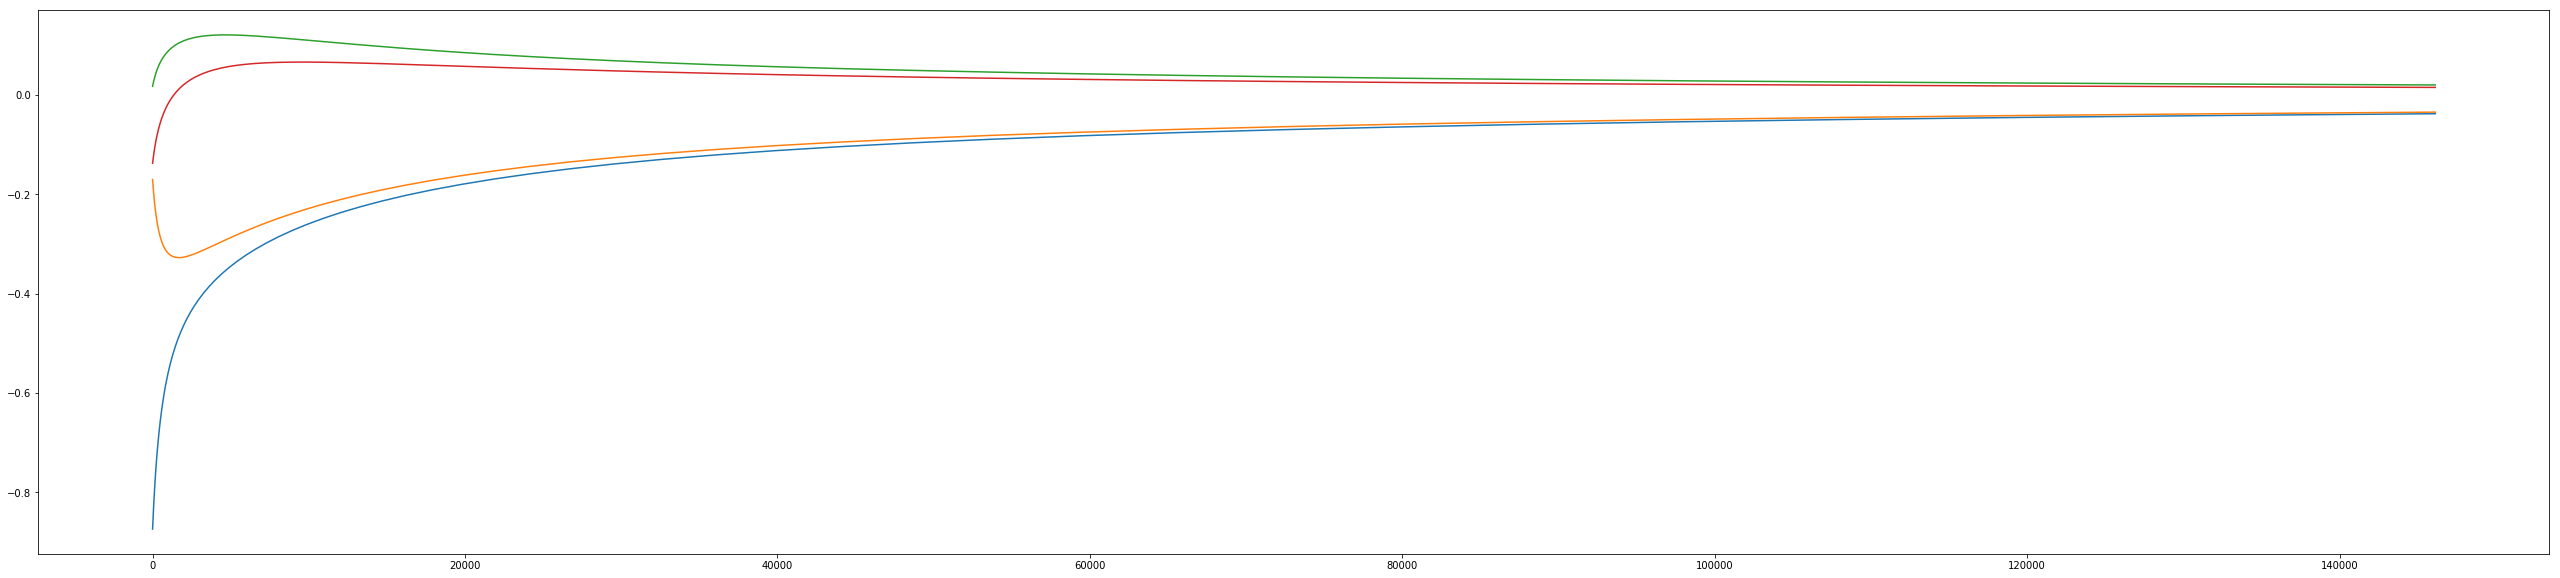

alpha = 14.764781565576772, R^2 = 0.9286866032265363, coeffs = [-0.86312086 -0.17674686  0.01970109 -0.13356755], indepenent term: -0.1335675536475084


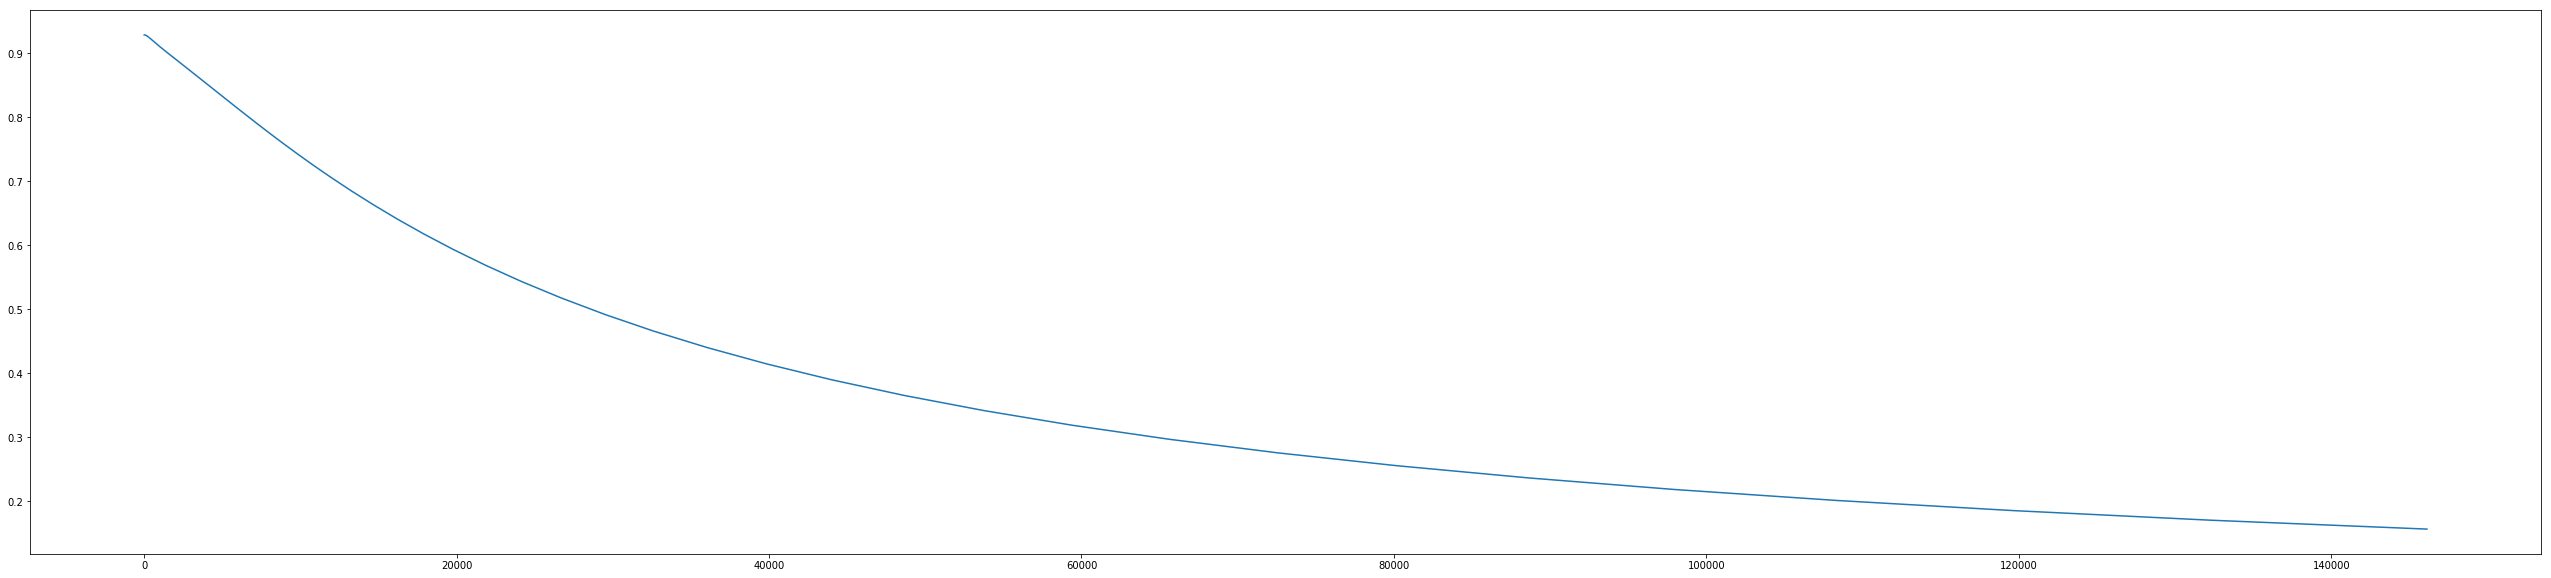

Lasso


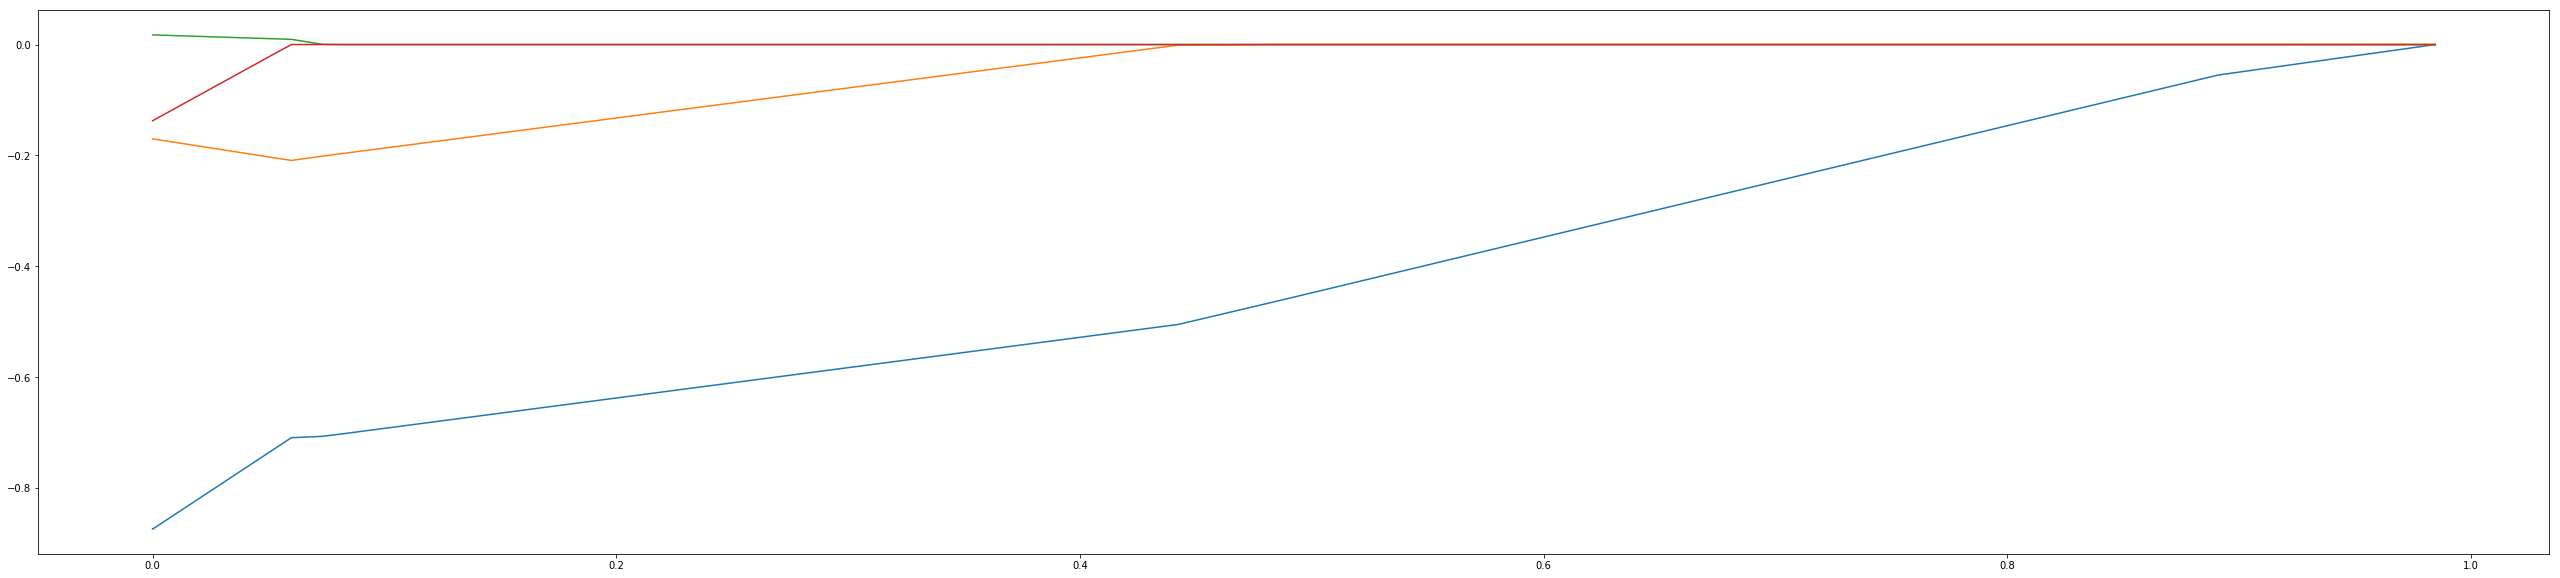

alpha = 0.001096633158428432, R^2 = 0.9286709121569743, coeffs = [-0.87130781 -0.17069955  0.01717191 -0.13508882], indepenent term: -0.13508881646498772


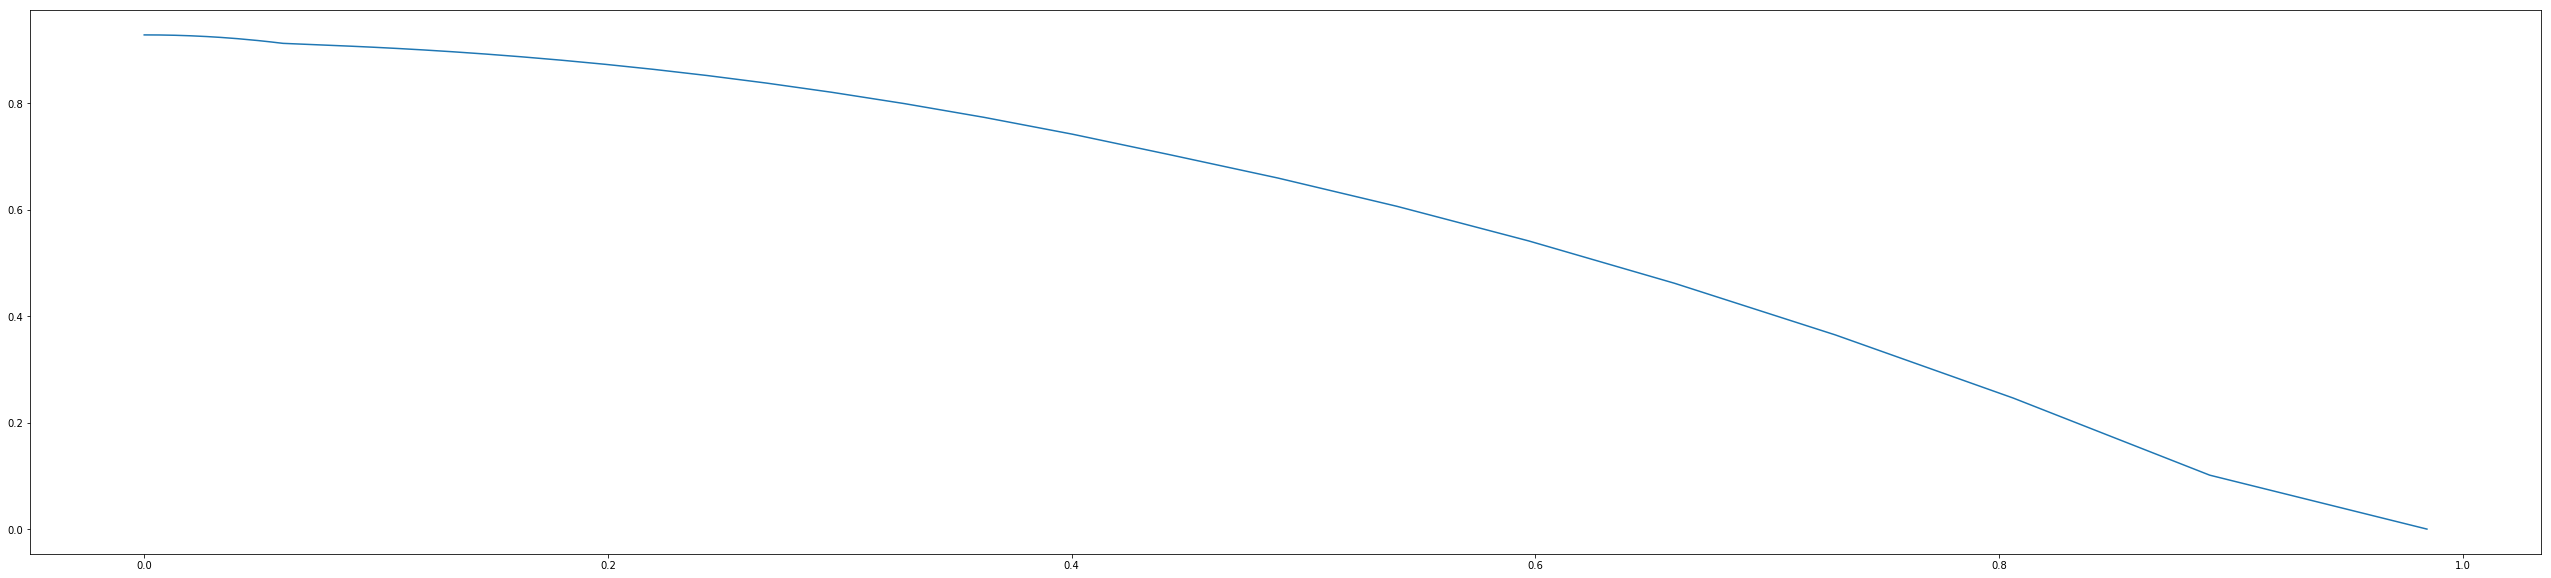

In [3]:
def analyse(DataSet, deg, ridge, lasso, plot = True, coeffs = True, dcda = False):
    scaler = StandardScaler(copy = False)
    scaler.fit_transform(DataSet)

    Data = DataSet[:, 0:-1]
    Predict = DataSet[:, -1]

    pol = PolynomialFeatures(degree = deg)
    Data = pol.fit_transform(Data)

    X_train, X_test, Y_train, Y_test = train_test_split(Data, Predict, test_size=0.33, random_state=42)


    def helper(model):
        model.fit(X_train, Y_train) #обучить модель
        return (model.score(Data, Predict), model.coef_, model.intercept_)

    def check(model, a0=None, a1=None):
        print(type(model).__name__)
        if (a0 == None):
            h = helper(model)
            print('R^2 = {}, indepenent term: {},'.format(h[0], h[2]))
            if (coeffs):
                print('coeffs = {},'.format(h[1][1:]))
            return

        x = np.exp(np.arange(np.log(a0), np.log(a1), step=0.1))
        y = []
        z = []

        for a in x:
            model.__init__(alpha=a)
            t = helper(model)
            y.append(t[0])
            z.append(np.array(t[1], t[2]))
        
        z = np.array(z)
        if (dcda):
            plt.figure(figsize=(45, 10))
            for i in range(z[0].shape[0] - 1):
                plt.plot(x, z[:, i+1])
            plt.show()
            
        imax = np.argmax(y)
        if (coeffs):
            print('alpha = {}, R^2 = {}, coeffs = {}, indepenent term: {}'.format(x[imax], y[imax], z[imax][1:], z[imax][-1]))
        
        if(plot):
            plt.figure(figsize=(45, 10))
            plt.plot(x, y)
            plt.show()

    check(LinearRegression(normalize = True))
    check(Ridge(), ridge[0], ridge[1])
    check(Lasso(), lasso[0], lasso[1])
    
analyse(DataSet = ElectricityRaw.values, deg = 1, ridge = [0.001, 150_000], lasso = [0.000001, 1], dcda = True)

### Часть 1. Линейная регрессия

Полученный R<sup>2</sup>-score равен 0.92, что является отличным результатом. 

Коэффициенты, выведенные работой регрессии, равны: -0.87, -0.17,  0.017, -0.14 для T, AP, RH, V соответственно, где:
        
- T - Temperature
- AP - Ambient Pressure
- RH - Relative Humidity
- V - Exhaust Vacuum

Исходя из знаков при коэффициентах видно, что только значение относительной влажности(RH) положительно влияет на количество вырабатываемого электричества в час(PE). Однако его вклад в общую картину чрезвычайно мал(значение коэффициента лишь |0.017|, когда у других признаков минимум |0.14|) Оставшиеся же признаки направлены в обратную сторону. Самым важным признаком согласно полученным результатам является температура воды. Похоже, чем она ниже, тем больше вырабатывается электричества.

### Часть 2. Ridge регрессия

Значение R<sup>2</sup>-score при alpha = 100, как просилось в задании, равно 0.92 и отличается от значения R<sup>2</sup>-score меньше чем на 0.001. 

Коэффициенты: -0.80, -0.21,  0.032, -0.11 для T, AP, RH, V соответственно. Результат похож на значение, выданное линейной регрессией.

Лучший из полученных нами R<sup>2</sup>-score равен 0.92 при параметре alpha = 44.7. Выводит alpha = 14 из-за того, что огромный отрезок делим лишь на 50 частей. Отсюда и возникает неточность.  Это отличается от результата линейной регрессии на 0.00001, что говорит о небольшом приросте точности.

Коэффициенты, которые выдала регрессия при таком значении alpha, такие: -0.84, -0.19 ,  0.024 , -0.13 для T, AP, RH, V соответственно. Они почти не отличаются от кофиициентов, выведенных линейной регрессией, что лишь подтверждает правильность проделанной работы. Закономерности те же самые, что и в Части 1.

График зависимости коэффициентов также представлен. Соответсвие цвет - признак:
    
- Синий - T
- Оранжевый - AP
- Зеленый - RH
- Красный - V

### Часть 3. Lasso регрессия

Значение R<sup>2</sup>-score при alpha = 10, как просилось в задании, равно 0.001 что так же является ужасным значением(идеаальное значение это |1|)

Коэффициенты сильно отличаются. Это произошло из-за того, что значение 100 слишком сильно отличается от максимального.
    
Лучший из полученных нами R<sup>2</sup>-score равен 0.93 при параметре alpha = 0.001(Очень далеко от 10ти). Это лучше чем результат линейной регрессии на 0.1, что говорит о достаточном(относительно предыдущих случаев) приросте точности.

Коэффициенты, которые выдала регрессия при таком значении alpha, такие: -0.87, -0.17,  0.017, -0.13 для T, AP, RH, V соответственно. Коэффициенты в очередной раз почти не отличаются...
![Альтернативный текст](ResidentSleeper.jpg)

Подумав немного, мы поняли, что для лучших случае коэффициенты и не должны отличаться. Это же лучшие случаи как никак :)

Зависимость коэффициентов от параметра alpha присутсвует. Коэффициенты зануляются в следующем порядке: V -> RH -> AP -> T

Если бы порядок был RH -> V -> AP -> T, то можно было бы предположить, что коэффициенты зануляются в порядке увеличения значимости признаков, но почему-то порядок V -> RH, а не наоборот. Возможно это какая-то неточность в вычислениях

Дальше мы поработали со 2м датасетом.

In [5]:
SoundRaw = pd.read_csv('sound.csv', header=None, names=['Frequency', 'Angle', 'Length', 'Velocity', 'Thickness', 'Pressure'])
SoundRaw.describe()

,Frequency,Angle,Length,Velocity,Thickness,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


LinearRegression
R^2 = 0.8462214510074061, indepenent term: -105134772099.56651,
coeffs = [-1.65365987e+00 -1.76119892e+01 -2.53683915e+00  2.02104532e+11
  1.45206684e+01  2.57922244e-01 -1.17329223e+00  4.10214145e-01
  4.82593674e-02  2.46274975e-01  8.82299771e+00 -1.23187378e+01
 -9.16204790e-01 -3.58014910e+01 -2.66721129e+00  5.66102214e-01
  6.45206668e+00  5.63327008e+11  1.67263100e+00  1.30941127e+01
  3.09216046e-01 -1.78327412e-01  8.32901067e-01 -1.07987495e-01
  1.44503844e+00 -1.87155289e+00 -3.59086980e+00  1.41911064e-01
  2.24269288e+00 -2.99633148e-01  9.83650447e-02  3.16751584e+00
 -3.38040583e-02 -1.32698899e-01 -2.40175537e-01 -1.16637432e+00
  1.97381460e+01 -1.14777717e+00  1.49144425e+01  1.10788802e+01
 -2.42380681e+00 -4.62735323e+01  8.44946078e-01  1.20248744e+00
 -1.74638227e+01  2.47927032e+00 -5.46891049e-01 -9.58667042e+00
  3.67994860e-01  2.60571368e+00  1.84278924e+01 -1.03586322e+11
 -1.16343865e+00 -1.04934827e+00  1.37597631e+00 -3.21508935e-02


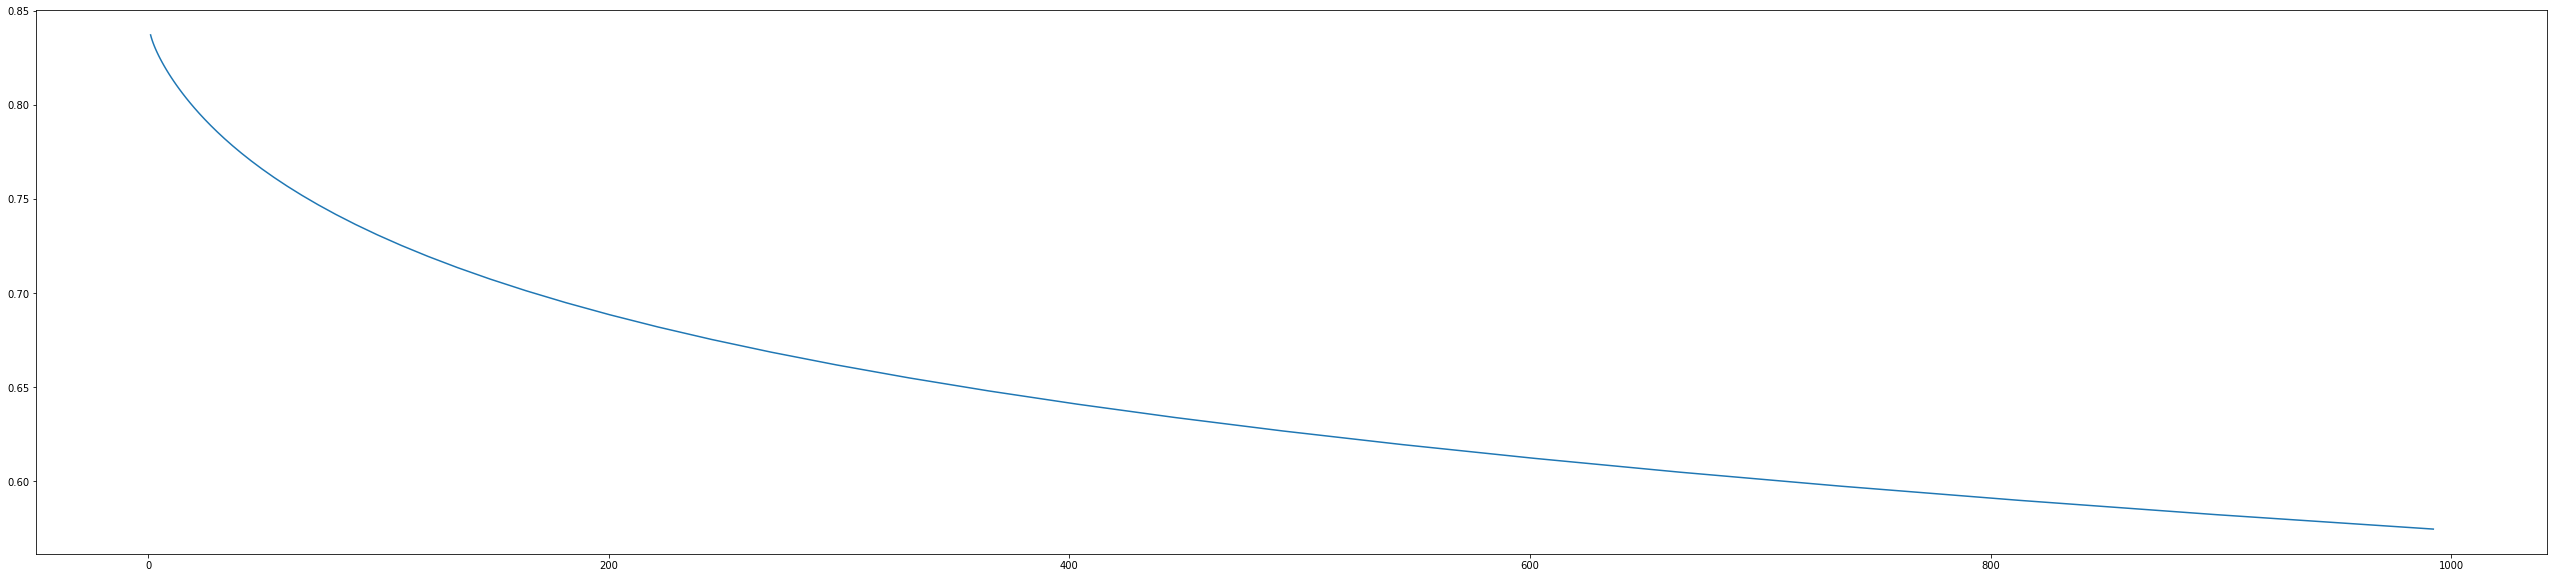

Lasso
alpha = 0.0006668633104092413, R^2 = 0.8249217830581926, coeffs = [-1.75458033e+00 -8.08864123e-01 -9.01181650e-01  3.87429222e-01
 -4.16649173e-01  2.87879809e-01 -0.00000000e+00 -2.92640334e-01
 -7.59947955e-02 -4.81083908e-01 -3.58706628e-01 -0.00000000e+00
  4.43718733e-02  0.00000000e+00  4.40208938e-01  3.91378001e-02
 -2.34093678e-01 -2.80721512e-03 -0.00000000e+00  0.00000000e+00
  9.03949637e-02  2.51126501e-01  6.16579096e-01 -1.14565229e-01
  5.96768625e-01  1.47308961e-02 -1.32962530e-01 -8.78952311e-02
  9.85993598e-01  4.51619056e-01 -5.17680054e-02  3.63200721e-01
 -0.00000000e+00 -5.52307551e-02  6.75060461e-02 -3.19624247e-02
  7.47996308e-02 -0.00000000e+00  0.00000000e+00  9.28879570e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.87791622e-01
  6.47481735e-02 -3.36996389e-02  3.21764038e-02  4.34874804e-01
 -8.36769510e-03 -8.05234547e-02 -8.98003503e-02 -0.00000000e+00
 -3.90326112e-03 -2.09076475e-02 -1.98519994e-02 -2.32895325e-02
 -4.18807148e-02 -

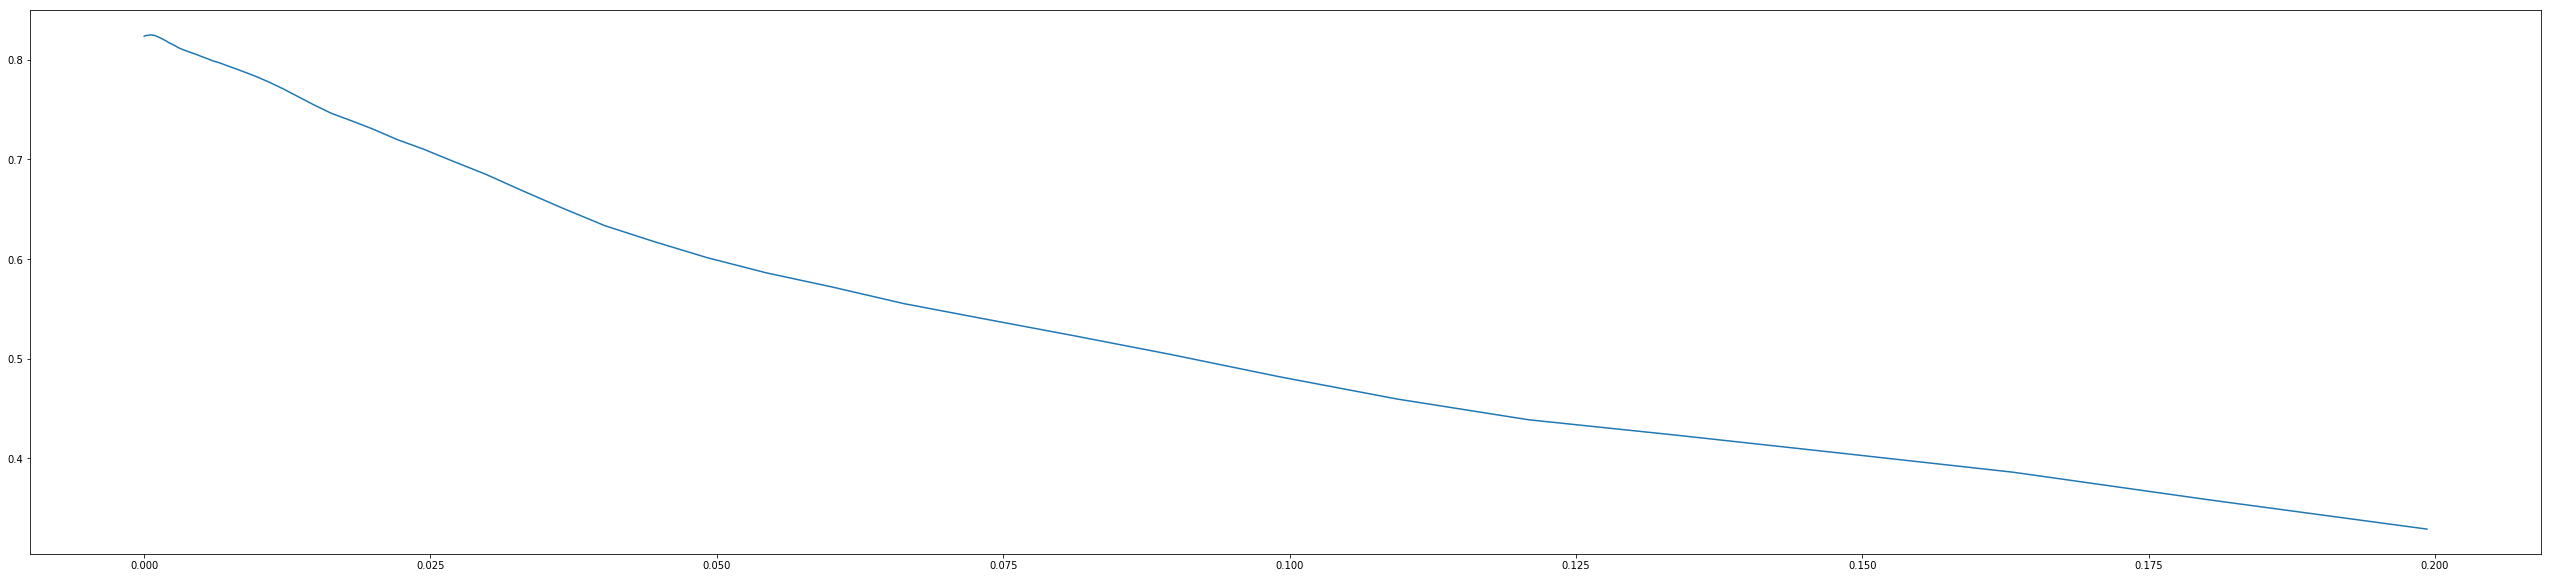

In [11]:
analyse(DataSet = SoundRaw.values, deg = 4, ridge = [1, 1000], lasso = [0.00001, 0.2], coeffs=True, dcda=False)
# Warning, который я подавил для Lasso метода:
# ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 
# Fitting data with very small alpha may cause precision problems.

Лучший результат, который мы получили, это R<sup>2</sup>-score равный 0.846! Учитывая правила округления это можно округлить до 0.85)

Результат получен с помощью линейной регрессии при 4й степени полинома.